<a href="https://colab.research.google.com/github/milly-lauren/aiHW2/blob/problem3/hw2c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIFAR10 Data Set


**Load and Format the Data**

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [59]:
train_images.shape

(50000, 32, 32, 3)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**Build "Good" Model**

This model has an average accuracy in both training and validation. The deviation between the two is minimal.

In [0]:
# 2D, Maxpooling, 2D, Maxpooling, 2D, Dense, Dense
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [63]:
epochs = 8
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 48s 954us/sample - loss: 1.5934 - acc: 0.4151 - val_loss: 1.3474 - val_acc: 0.5170
Epoch 2/8
50000/50000 [==============================] - 47s 945us/sample - loss: 1.2595 - acc: 0.5503 - val_loss: 1.2425 - val_acc: 0.5640
Epoch 3/8
50000/50000 [==============================] - 46s 928us/sample - loss: 1.1160 - acc: 0.6061 - val_loss: 1.0597 - val_acc: 0.6249
Epoch 4/8
50000/50000 [==============================] - 46s 925us/sample - loss: 1.0141 - acc: 0.6436 - val_loss: 1.0147 - val_acc: 0.6422
Epoch 5/8
50000/50000 [==============================] - 46s 921us/sample - loss: 0.9439 - acc: 0.6700 - val_loss: 0.9772 - val_acc: 0.6594
Epoch 6/8
50000/50000 [==============================] - 46s 928us/sample - loss: 0.8944 - acc: 0.6862 - val_loss: 0.9987 - val_acc: 0.6564
Epoch 7/8
50000/50000 [==============================] - 46s 927us/sample - loss: 0.8488 - acc: 0.7039 - val_l

*Accuracy*

In [64]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 3s 336us/sample - loss: 0.9533 - acc: 0.6748
Test accuracy: 0.6748


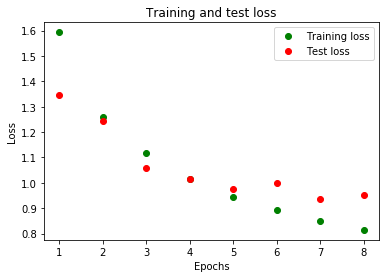

In [65]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'go', label='Training loss')
plt.plot(epochs_range, test_loss_values , 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

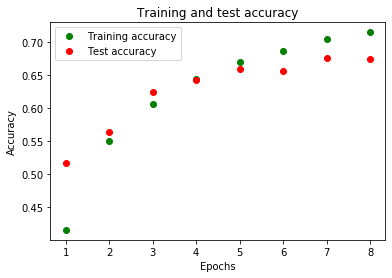

In [66]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'go', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Build Overfit Model**

This model is complex with the number of training cycles, and the number of features it extracts, along with the kernel sizes. It trains well, but does not perform well during validation.

In [0]:
# 2D, Maxpooling, 2D, Dense, Dense
model = keras.Sequential([
    keras.layers.Conv2D(32, (4, 4), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (4, 4), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [69]:
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 1.4519 - acc: 0.4768 - val_loss: 1.2372 - val_acc: 0.5585
Epoch 2/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 1.1389 - acc: 0.5977 - val_loss: 1.0689 - val_acc: 0.6225
Epoch 3/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.9970 - acc: 0.6515 - val_loss: 1.0266 - val_acc: 0.6485
Epoch 4/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.8898 - acc: 0.6884 - val_loss: 0.9666 - val_acc: 0.6645
Epoch 5/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.8109 - acc: 0.7166 - val_loss: 1.0584 - val_acc: 0.6434
Epoch 6/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.7297 - acc: 0.7455 - val_loss: 0.9590 - val_acc: 0.6795
Epoch 7/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.6705 - acc: 0.7648 - val_loss: 0.

*Accuracy*

In [70]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 4s 408us/sample - loss: 1.1325 - acc: 0.6665
Test accuracy: 0.6665


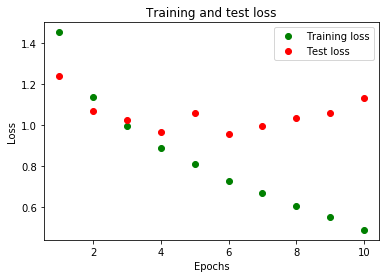

In [71]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'go', label='Training loss')
plt.plot(epochs_range, test_loss_values , 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

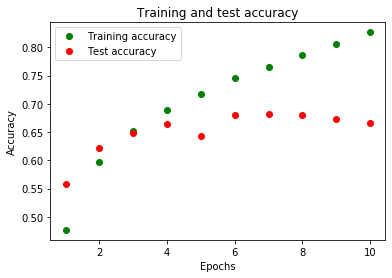

In [72]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'go', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Build Underfit Model**

This model does not extract as many feautres as the past models, and it performs poorly in both training and validation.

In [0]:
# 2D, Maxpooling, 2D, Maxpooling, 2D, Dense, Dense
model = keras.Sequential([
    keras.layers.Conv2D(4, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(8, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(16, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [75]:
epochs = 5
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 34s 673us/sample - loss: 1.8862 - acc: 0.3102 - val_loss: 1.6917 - val_acc: 0.3962
Epoch 2/5
50000/50000 [==============================] - 33s 670us/sample - loss: 1.6251 - acc: 0.4147 - val_loss: 1.5583 - val_acc: 0.4335
Epoch 3/5
50000/50000 [==============================] - 33s 666us/sample - loss: 1.5280 - acc: 0.4477 - val_loss: 1.4957 - val_acc: 0.4626
Epoch 4/5
50000/50000 [==============================] - 33s 667us/sample - loss: 1.4598 - acc: 0.4767 - val_loss: 1.5100 - val_acc: 0.4550
Epoch 5/5
50000/50000 [==============================] - 33s 668us/sample - loss: 1.4209 - acc: 0.4899 - val_loss: 1.4149 - val_acc: 0.4863


*Accuracy*

In [76]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 3s 308us/sample - loss: 1.4149 - acc: 0.4863
Test accuracy: 0.4863


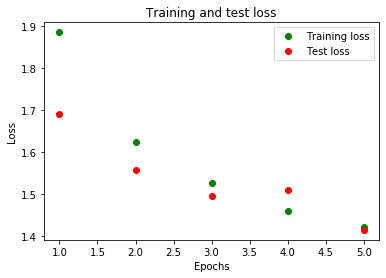

In [77]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'go', label='Training loss')
plt.plot(epochs_range, test_loss_values , 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

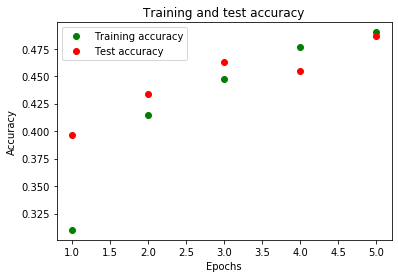

In [78]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'go', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()